In [151]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [152]:
data_x = [
 'good',  'well done', 'nice', 'Excellent',
 'Bad', 'OOps I hate it deadly', 'embrassing', 'A piece of shit']

label_x = np.array([1,1,1,1, 0,0,0,0])

one_hot_x = [tf.keras.preprocessing.text.one_hot(d, 50) for d in data_x]

print(one_hot_x)

[[37], [5, 9], [29], [14], [34], [41, 46, 21, 37, 19], [49], [42, 25, 38, 42]]


In [153]:
padded_x = tf.keras.preprocessing.sequence.pad_sequences(one_hot_x, maxlen=4, padding = 'post')

print(padded_x)

[[37  0  0  0]
 [ 5  9  0  0]
 [29  0  0  0]
 [14  0  0  0]
 [34  0  0  0]
 [46 21 37 19]
 [49  0  0  0]
 [42 25 38 42]]


In [154]:
sample_data = np.array([[1], [4]], dtype='int32')

emb_layer = tf.keras.layers.Embedding(50, 4, input_length=4)

print(emb_layer(sample_data))

tf.Tensor(
[[[ 0.04416226  0.00613157  0.01840985 -0.04001393]]

 [[ 0.02356425  0.02525392 -0.02256091 -0.00441856]]], shape=(2, 1, 4), dtype=float32)


In [155]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(50, 8, input_length=4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
 ])

In [156]:
model.compile(optimizer='adam', loss='binary_crossentropy', 
metrics=['accuracy'])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_30 (Embedding)    (None, 4, 8)              400       
                                                                 
 flatten_14 (Flatten)        (None, 32)                0         
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 433
Trainable params: 433
Non-trainable params: 0
_________________________________________________________________


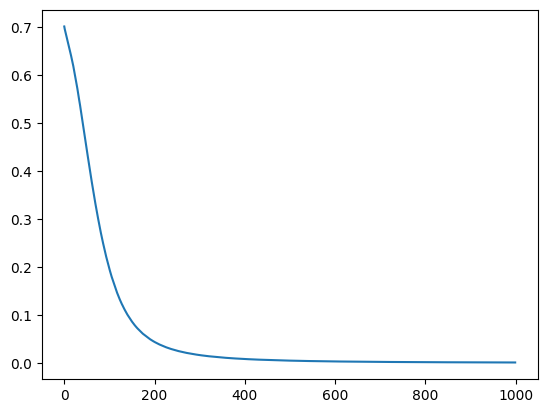

In [157]:
history = model.fit(padded_x, label_x, epochs=1000, 
batch_size=2, verbose=0)

plt.plot(history.history['loss'])

In [158]:
def predict(word):
    one_hot_word = [tf.keras.preprocessing.text.one_hot(word, 50)]
    pad_word = tf.keras.preprocessing.sequence.pad_sequences(one_hot_word, maxlen=4,  padding='post')
    result = model.predict(pad_word)
    index = result[0][0]
    print(index)
    if index > 0.1:
        print('you look positive')
    else:
        print('damn you\'re negative')

In [159]:
predict('this tutorial is cool')

1/1 [==============================] - 0s 27ms/step
0.38314292
you look positive


In [160]:
predict('This tutorial is bad as me')

1/1 [==============================] - 0s 10ms/step
0.18381602
you look positive
